<a href="https://colab.research.google.com/github/RoRdil31/Data-Science-Learning-as-a-Project/blob/main/4_2_%EB%8B%A4%EC%96%91%ED%95%9C_tree%EA%B3%84%EC%97%B4_ML_Model_%EC%82%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-04.ipynb)


* 강좌 보기 : https://www.boostcourse.org/ds214/


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [4]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette('pastel')

%matplotlib inline

## 데이터셋 로드

In [5]:
from google.colab import drive
drive.mount('/content/mnt/')

import os
os.chdir('/content/mnt/MyDrive/Colab Notebooks/Boostcourse_Project_DS')
print(os.getcwd())


Mounted at /content/mnt/
/content/mnt/MyDrive/Colab Notebooks/Boostcourse_Project_DS


In [6]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [7]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [9]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [10]:
y = df['Outcome']
y.shape

(768,)

In [11]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [12]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [13]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## 머신러닝 알고리즘 사용하기
* [결정 트리 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC)
* [결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)
* [랜덤 포레스트 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)
* [배깅 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B0%B0%EA%B9%85)
<img src="https://upload.wikimedia.org/wikipedia/commons/8/83/0_jW2hAGmYEFH0RP9W.png">

이미지 출처 : https://upload.wikimedia.org/wikipedia/commons/8/83/0_jW2hAGmYEFH0RP9W.png

###  Single tree

In [14]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state=42)
# model

### Bagging

In [97]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model

RandomForestClassifier(random_state=42)

### Boosting
* https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

<img src="https://quantdare.com/wp-content/uploads/2016/04/bb3.png" width="600">

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model


GradientBoostingClassifier(random_state=42)

## 여러 개의 알고리즘을 사용해서 비교하기
(RandomSearchCV)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
             RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42)
            ]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [71]:
result = []
for estimator in estimators:
  result.append(estimator.__class__.__name__)

result

['DecisionTreeClassifier',
 'RandomForestClassifier',
 'GradientBoostingClassifier']

In [82]:
max_depth = np.random.randint(2,20,10)
max_features = np.random.uniform(0.3,1.0,10)


param_distributions = {'max_depth':max_depth,
                       'max_features':max_features}

results = []
for estimator in estimators:
  result = []
  if estimator.__class__.__name__ != 'DecisionTreeClassifier':
    param_distributions['n_estimators'] = np.random.randint(100,1000,10) # 100~1000까지 랜덤하게 10개 생성.

  clf = RandomizedSearchCV(estimator,
                    param_distributions,
                    n_iter=10,
                    scoring = 'accuracy',
                    n_jobs=-1,
                    cv = 5,
                    verbose=2)
  clf.fit(X_train,y_train)
  result.append(estimator.__class__.__name__)
  result.append(clf.best_params_)
  result.append(clf.best_score_)
  result.append(clf.score(X_test,y_test))
  result.append(clf.cv_results_)

  results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [86]:
df = pd.DataFrame(results,columns=['estimator','best_params','train_score','test_score','cv_result'])

In [96]:
pd.DataFrame(df.loc[1,'cv_result']).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.887155,0.015957,0.034553,0.002394,304,0.397242,15,"{'n_estimators': 304, 'max_features': 0.397241...",0.878049,0.934959,0.869919,0.894309,0.934426,0.902332,0.027565,1
9,1.637356,0.232178,0.058434,0.011929,604,0.335186,11,"{'n_estimators': 604, 'max_features': 0.335186...",0.869919,0.934959,0.869919,0.894309,0.934426,0.900706,0.029144,2
2,2.234357,0.451868,0.068267,0.002612,646,0.335186,11,"{'n_estimators': 646, 'max_features': 0.335186...",0.861789,0.934959,0.869919,0.894309,0.934426,0.899080,0.030985,3
6,3.469365,0.657724,0.100560,0.024748,844,0.714367,18,"{'n_estimators': 844, 'max_features': 0.714366...",0.861789,0.943089,0.853659,0.894309,0.934426,0.897454,0.036468,4
4,3.592669,0.747265,0.104009,0.032404,892,0.715906,15,"{'n_estimators': 892, 'max_features': 0.715906...",0.869919,0.943089,0.853659,0.894309,0.926230,0.897441,0.033457,5
8,0.537529,0.012620,0.018507,0.001083,153,0.809537,15,"{'n_estimators': 153, 'max_features': 0.809537...",0.878049,0.934959,0.845528,0.878049,0.926230,0.892563,0.033360,6
1,2.921774,0.232938,0.090010,0.002507,969,0.715906,3,"{'n_estimators': 969, 'max_features': 0.715906...",0.837398,0.910569,0.829268,0.853659,0.942623,0.874703,0.044268,7
3,2.616001,0.461239,0.091717,0.011701,892,0.331934,3,"{'n_estimators': 892, 'max_features': 0.331933...",0.821138,0.894309,0.853659,0.878049,0.918033,0.873037,0.033380,8
5,2.402670,0.148904,0.077330,0.003443,844,0.809537,2,"{'n_estimators': 844, 'max_features': 0.809537...",0.788618,0.886179,0.837398,0.804878,0.950820,0.853579,0.058944,9
0,1.721545,0.195837,0.065479,0.031811,304,0.778089,2,"{'n_estimators': 304, 'max_features': 0.778089...",0.788618,0.878049,0.829268,0.804878,0.942623,0.848687,0.055840,10


In [66]:
# clf.best_params_

{'max_features': 0.7248631236334422, 'max_depth': 5}

In [67]:
# clf.best_score_

0.8664934026389444

## 학습과 예측하기

In [98]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
model.feature_importances_

array([0.14724421, 0.04737896, 0.07125703, 0.0915895 , 0.0647634 ,
       0.10255183, 0.01102453, 0.43133793, 0.03285262])

In [100]:
feature_names = X_train.columns.tolist()

<ipython-input-101-f7ce9a06e1e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.feature_importances_, y=feature_names,palette=color)
<ipython-input-101-f7ce9a06e1e2>:1: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(x=model.feature_importances_, y=feature_names,palette=color)


<Axes: >

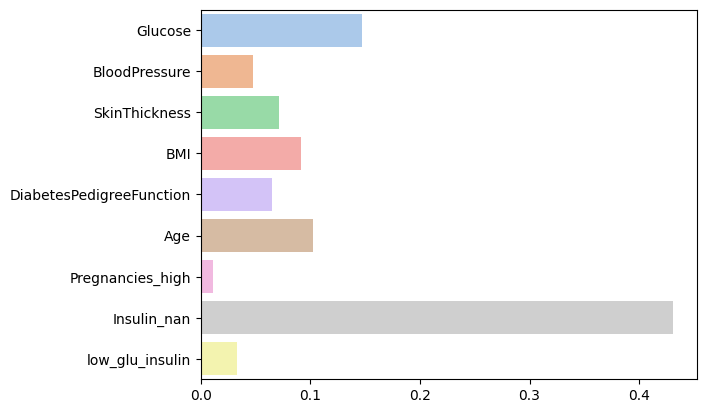

In [101]:
sns.barplot(x=model.feature_importances_, y=feature_names,palette=color)

In [54]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

## 정확도(Accuracy) 측정하기

In [55]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.
# DT : 28
# RF : 20
# GB : 24

(y_predict != y_test).sum()

24

In [56]:
# accuracy score를 구합니다.
# DT: 0.818
# RF: 0.870
# GB: 0.844

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8441558441558441